In [1]:
# IMPORTS
import glob, os, sys
import numpy as np
sys.path.insert(0,'../../')
sys.path.insert(0,'/Library/TeX/texbin/')
sys.path.insert(0,'../../WaveformAnalysis')
#from Gat import Gat
from Gat_HPC import Gat_HPC as Gat

# DATA SOURCE
path = r'/Users/tizi/Documents/YALE_WL.nosync/data/202206[0-1]*/'

In [2]:
gat = Gat(path, 'wave*',5.00,debug=False,force=True,notify=False)

 [12:18:27PM - __init__]:  2576 files and 1 voltages loaded 


 [12:18:30PM - eval_waveform_func_fit]:  Loading from backup file 


IntProgress(value=0, bar_style='info', description='Loading perms...', layout=Layout(width='100%'), max=12960)

 [12:18:30PM - __find_best]:  Multiprocessing does not support progress bars. Disregard it. 
 [12:18:58PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:00PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:29PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:29PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:29PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:29PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:31PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached maxfev = 800. 
 [12:19:31PM - __get_peaks]:  Optimal parameters not found: Number of calls to function has reached ma

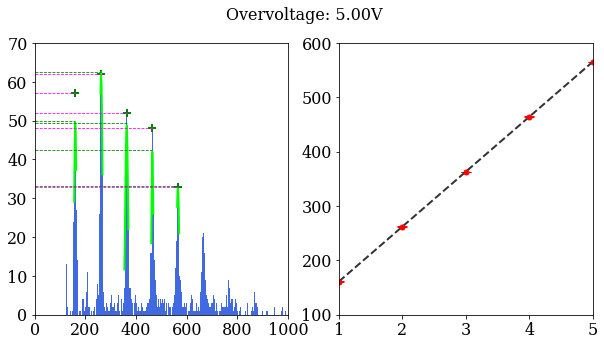

(60.32515038652361, 0.2681855700165283)

In [3]:
gat.eval_gain(5.00,plot=False,find_best=True)

(60.32515038652361, 0.2681855700165283)
plotting
[160.60532350541186, 262.32287933180226, 363.1442724172944, 464.5248348105185, 565.0542049685057]
[0.9487103123776829, 0.3641878146873501, 0.3887398937447293, 0.6694126216797648, 0.08993950790314717]


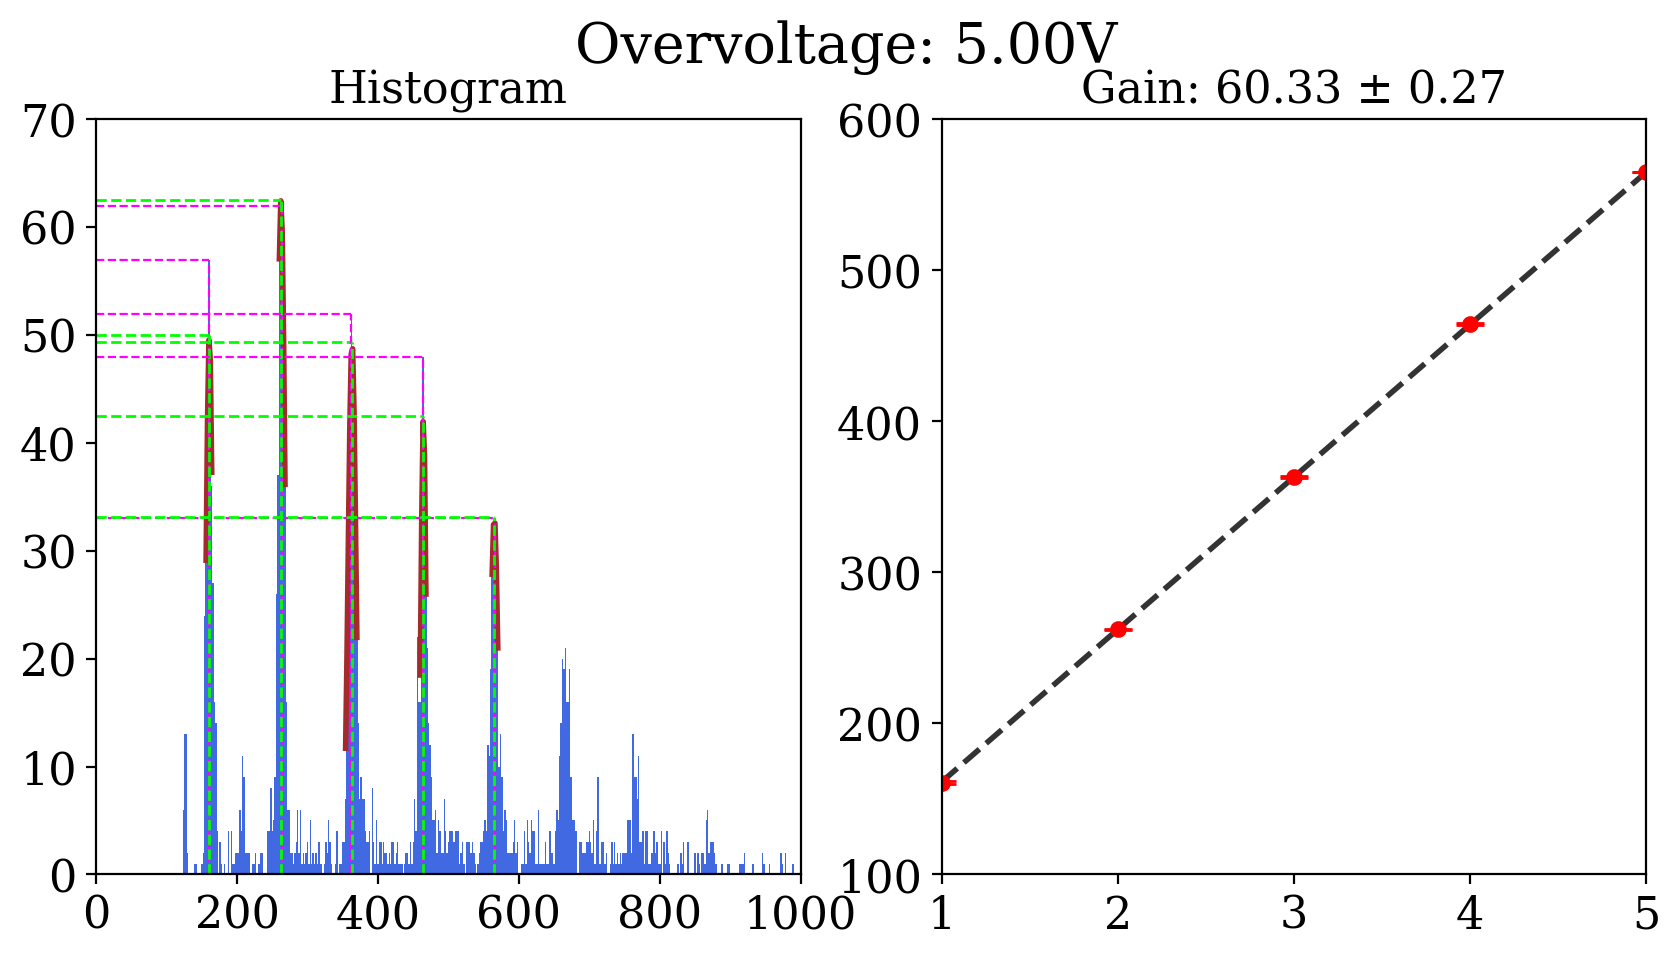

In [5]:
print(gat.gain_evaluation)
gat.plot(hist=True,gain=True,hist_fit=True)

In [5]:
#waves, peaks = gatter.eval_waveform_argmax(4.00,bounds=[390,396])
sys.exit()
for volt in gatter.voltages:
    gatter.eval_gain(volt,plot=True,find_best=True)
gatter.notify('Done','Loading completed!',0)

SystemExit: 

In [ ]:
print(type(eval))
if type(eval) is tuple:
    popt_list,perr_list = eval
    print()
    msg = ''
    print('Resulting peaks:')
    msg += 'Resulting peaks:\n'
    for ii,popt in enumerate(popt_list):
        perr = perr_list[ii]
        max_y = popt[0]
        if perr == False:print(f'{ANSI_RED} * {max_y:.16g} --> FIT FAILED{ANSI_RESET}')
        else:
            if perr == np.inf: print(f'{ANSI_BG_RED} * {max_y:.16g} \u00b1 {perr:.16g}{ANSI_RESET}')
            elif perr < 1: print(f' * {max_y:.16g} \u00b1 {ANSI_GREEN}{perr:.16g}{ANSI_RESET}')
            else: print(f' * {max_y:.16g} \u00b1 {perr:.16g}')
            msg += f' * {max_y:.10f} \u00b1 {perr:.10f}\n'
else:
    print(f'{ANSI_RED} Not a tuple. Cannot unpack eval_gain due to unexpected circumstances.{ANSI_RESET}')
    pp.pprint(eval)

#gatter.notify('Done loading peaks',eval,0)

<class 'tuple'>

Resulting peaks:


TypeError: 'float' object is not iterable